In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#chi square test
from scipy.stats import chi2_contingency
from itertools import combinations

In [15]:
train_df = pd.read_csv(r'C:\Users\sbhat\OneDrive - Arizona State University\Documents\Arizona State University Courses\Data Mining\Assignment\Mushroom\playground-series-s4e8 (1)\train.csv')
test_df = pd.read_csv(r'C:\Users\sbhat\OneDrive - Arizona State University\Documents\Arizona State University Courses\Data Mining\Assignment\Mushroom\playground-series-s4e8 (1)\test.csv')
combine = [train_df, test_df]

In [16]:
print(train_df.columns.values)

['id' 'class' 'cap-diameter' 'cap-shape' 'cap-surface' 'cap-color'
 'does-bruise-or-bleed' 'gill-attachment' 'gill-spacing' 'gill-color'
 'stem-height' 'stem-width' 'stem-root' 'stem-surface' 'stem-color'
 'veil-type' 'veil-color' 'has-ring' 'ring-type' 'spore-print-color'
 'habitat' 'season']


In [18]:
print("Shape:", train_df.shape)
train_df.head()

Shape: (3116945, 22)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


## Inspect Missing Values

In [21]:
# Check missing values (count + percentage)
missing_count = train_df.isna().sum()
missing_percent = (missing_count / len(train_df)) * 100

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_percent.round(2)
}).sort_values("missing_%", ascending=False)

print("Missing values summary:")
display(missing_table)


Missing values summary:


,missing_count,missing_%
veil-type,2957493,94.88
spore-print-color,2849682,91.43
stem-root,2757023,88.45
veil-color,2740947,87.94
stem-surface,1980861,63.55
gill-spacing,1258435,40.37
cap-surface,671023,21.53
gill-attachment,523936,16.81
ring-type,128880,4.13
id,0,0.00


In [23]:
print("Data types:")
print(train_df.dtypes)

train_df.info(show_counts=True)


Data types:
id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    3116945 non-null  int64 

## Drop high-missing columns & ID

In [25]:
df = train_df.copy()

df = df.drop(columns=['id'], errors='ignore')

high_missing_cols = ['veil-type', 'spore-print-color', 'stem-root', 'veil-color']
df = df.drop(columns=high_missing_cols, errors='ignore')

print("Dropped columns:", high_missing_cols + ['id'])
print("New shape:", df.shape)
df.head()


Dropped columns: ['veil-type', 'spore-print-color', 'stem-root', 'veil-color', 'id']
New shape: (3116945, 17)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


## Handle the remaining missing values (categorical = "missing", numeric = median)?

In [34]:
num_cols = ['cap-diameter', 'stem-height', 'stem-width']

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')  
df[num_cols] = df[num_cols].fillna(df[num_cols].median())          
print("NaNs left in numerics:", df[num_cols].isna().sum().sum())
print(df[num_cols].dtypes)



NaNs left in numerics: 0
cap-diameter    float64
stem-height     float64
stem-width      float64
dtype: object


In [30]:
# Title: Step 4b - Numeric preprocessing (coerce to float & median impute)

import numpy as np

# Identify numeric columns explicitly (or detect them)
num_cols = ['cap-diameter', 'stem-height', 'stem-width']
# If you prefer detection:
# num_cols = df.select_dtypes(include=['number']).columns.tolist()

# 1) coerce to numeric (in case any stray strings exist)
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

# 3) quick checks
print("Numeric columns:", num_cols)
print(df[num_cols].dtypes)
print("Any NaNs left in numerics?",
      int(df[num_cols].isna().sum().sum()))



Numeric columns: ['cap-diameter', 'stem-height', 'stem-width']
cap-diameter    float64
stem-height     float64
stem-width      float64
dtype: object
Any NaNs left in numerics? 0


In [33]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop('class')

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("NaNs left in categoricals:", df[cat_cols].isna().sum().sum())



NaNs left in categoricals: 0


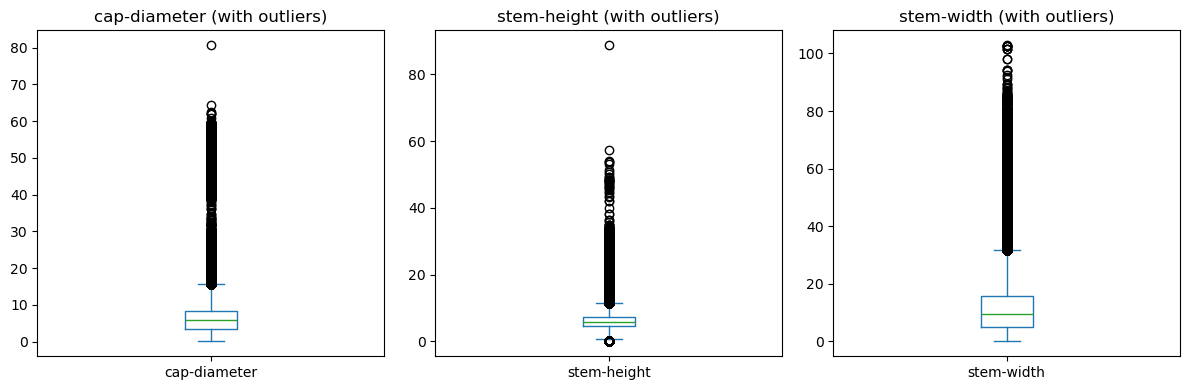

In [35]:
import matplotlib.pyplot as plt

num_cols = ['cap-diameter', 'stem-height', 'stem-width']

# plot boxplots for numeric features
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    df[col].plot(kind='box')
    plt.title(f"{col} (with outliers)")
plt.tight_layout()
plt.show()


## class distribution visualization

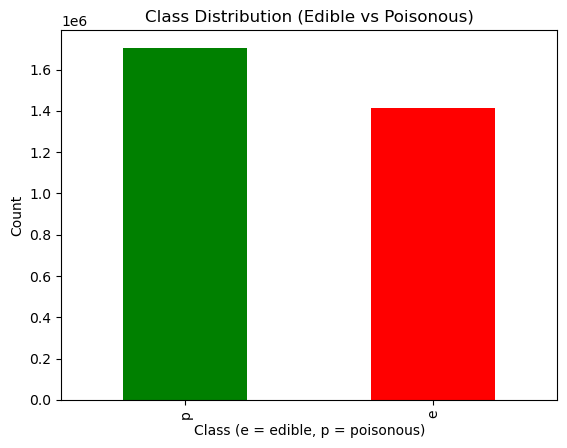

In [37]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class (e = edible, p = poisonous)")
plt.ylabel("Count")
plt.show()


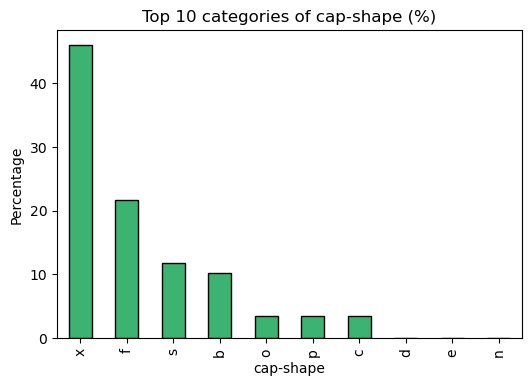

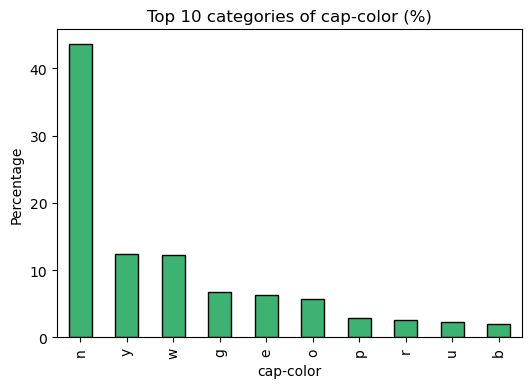

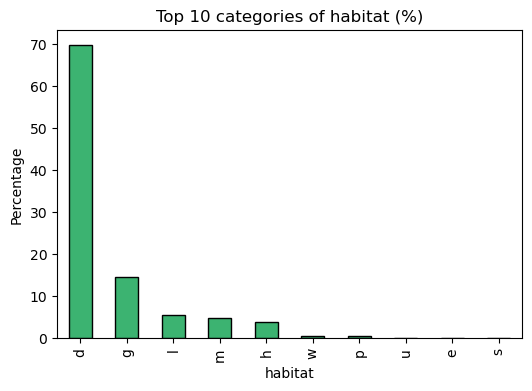

In [40]:
for col in cat_features_to_plot:
    plt.figure(figsize=(6,4))
    (df[col].value_counts(normalize=True).head(10) * 100).plot(kind='bar', color='mediumseagreen', edgecolor='black')
    plt.title(f"Top 10 categories of {col} (%)")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.show()



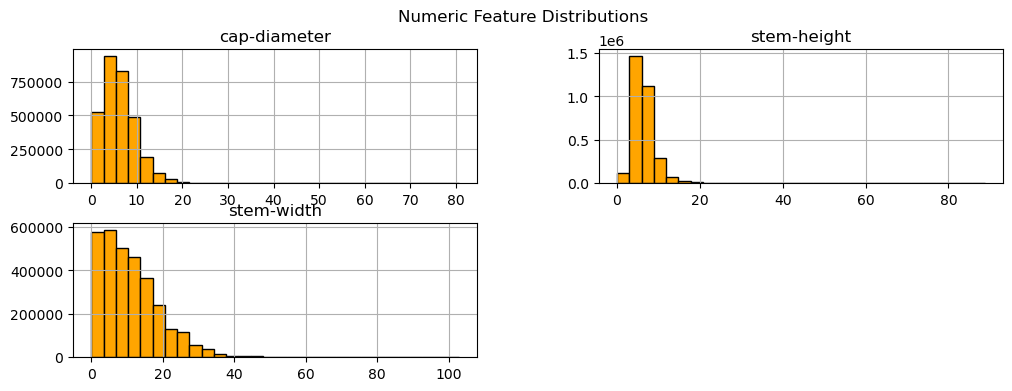

In [39]:
num_cols = ['cap-diameter', 'stem-height', 'stem-width']

df[num_cols].hist(bins=30, figsize=(12,4), color='orange', edgecolor='black')
plt.suptitle("Numeric Feature Distributions")
plt.show()


In [41]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy data
df_chi = df.copy()

# Encode target
le = LabelEncoder()
y = le.fit_transform(df_chi['class'])   # 0 = edible, 1 = poisonous

# Encode categoricals numerically
X_cat = df_chi.select_dtypes(include=['category','object']).drop(columns=['class'])
X_cat_encoded = X_cat.apply(LabelEncoder().fit_transform)

# Chi-square test
chi_scores, p_values = chi2(X_cat_encoded, y)

# Results table
chi_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_Score': chi_scores,
    'p_value': p_values
}).sort_values('Chi2_Score', ascending=False)

print(chi_results.head(10))


                 Feature    Chi2_Score  p_value
10             ring-type  38828.164951      0.0
0              cap-shape  35082.332331      0.0
9               has-ring  32827.356908      0.0
4        gill-attachment  19261.196410      0.0
6             gill-color  16566.432312      0.0
12                season  14572.612547      0.0
8             stem-color  11117.064464      0.0
3   does-bruise-or-bleed  10457.841718      0.0
1            cap-surface   6608.095230      0.0
2              cap-color   4026.849057      0.0


C:\Users\sbhat\AppData\Local\Temp\ipykernel_12076\1878670967.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette={'e':'green','p':'red'})
C:\Users\sbhat\AppData\Local\Temp\ipykernel_12076\1878670967.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette={'e':'green','p':'red'})
C:\Users\sbhat\AppData\Local\Temp\ipykernel_12076\1878670967.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette={'e':'green','p':'red'})


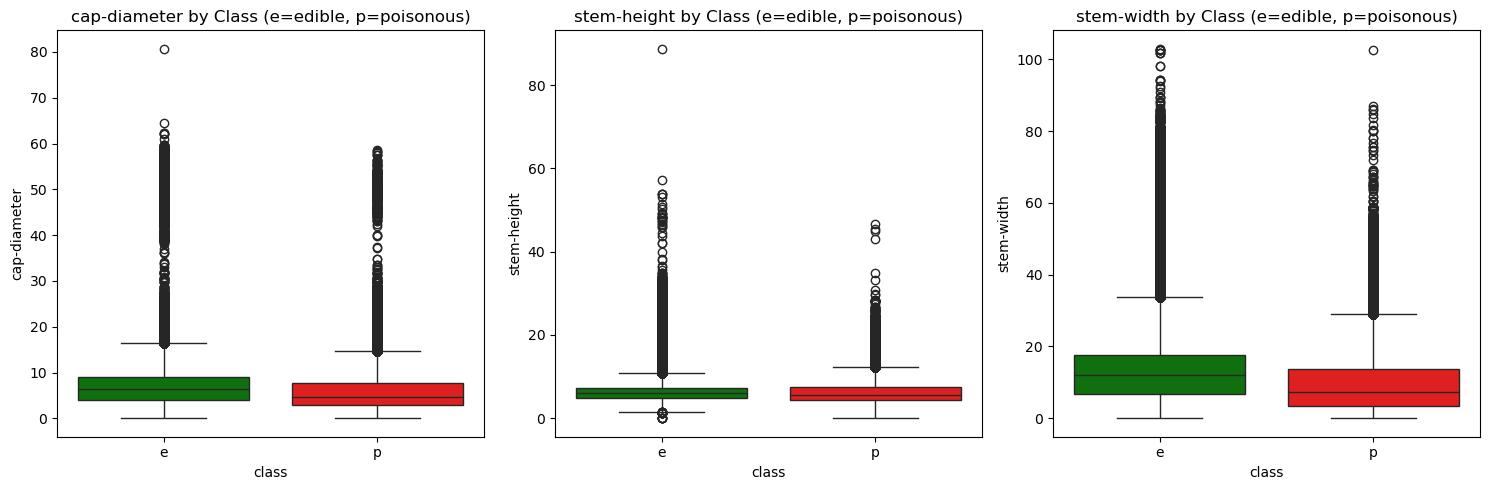

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='class', y=col, data=df, palette={'e':'green','p':'red'})
    plt.title(f"{col} by Class (e=edible, p=poisonous)")
plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split features/target
X = df.drop(columns=['class'])
y = df['class'].map({'e':0, 'p':1})   # 0 = edible, 1 = poisonous

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorical vs numeric
cat_cols = X_train.select_dtypes(include=['object','category']).columns
num_cols = X_train.select_dtypes(include=['number']).columns


## Logistic Regression

In [44]:
# Preprocessor: OneHot for categoricals, passthrough for numerics
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ("num", "passthrough", num_cols)
])

# Logistic Regression model
log_reg = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=500))
])

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))


C:\Users\sbhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.815607910951268
              precision    recall  f1-score   support

           0       0.78      0.82      0.80    282397
           1       0.85      0.81      0.83    340992

    accuracy                           0.82    623389
   macro avg       0.81      0.82      0.81    623389
weighted avg       0.82      0.82      0.82    623389



## Decision Tree  

In [45]:
tree = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', DecisionTreeClassifier(max_depth=5, random_state=42))
])

tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))
print(classification_report(y_val, y_pred_tree))


Decision Tree Accuracy: 0.7789903254629132
              precision    recall  f1-score   support

           0       0.76      0.75      0.75    282397
           1       0.79      0.81      0.80    340992

    accuracy                           0.78    623389
   macro avg       0.78      0.78      0.78    623389
weighted avg       0.78      0.78      0.78    623389

